<a href="https://colab.research.google.com/github/MujeebDawar/2-D-Convolution-Phyton/blob/main/Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
import matplotlib.pyplot as plt


In [9]:
!pip3 install mxnet-mkl==1.6.0 numpy==1.23.1

In [10]:
import numpy as np

In [11]:
#Download a file
from google.colab import files
uploaded = files.upload()

Saving Lenna.png to Lenna (1).png


In [12]:
img = cv2.imread('Lenna.png',0)

# **Rotation**

In [13]:
def rotate(image, angle, border_color=None):
    # grab the dimensions of the image and then determine the
    # center
    if border_color == None:
        border_color=(255, 255, 255)

    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH), borderValue=border_color)

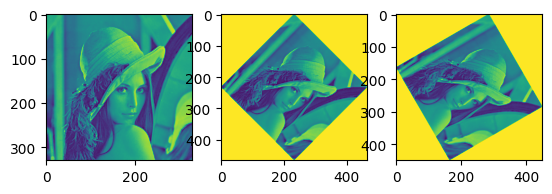

In [14]:
rotated_image1 = rotate(img, angle=45)
rotated_image2 = rotate(img, angle=60)

fig = plt.figure()
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(rotated_image1)
plt.subplot(133)
plt.imshow(rotated_image2)

# **Transform**

In [15]:
def translate(img, x, y, border_size=None, border_color=None):
    if border_size == None:
        border_size = (img.shape[1], img.shape[0])
    if border_color == None:
        border_color=(255, 255, 255)
    return cv2.warpAffine(img,
               np.array([[1, 0, x],
                        [0, 1, y]],
                dtype = np.float),
               border_size, borderValue=border_color) # right down shift

<ipython-input-15-23c8317f59b1>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float),


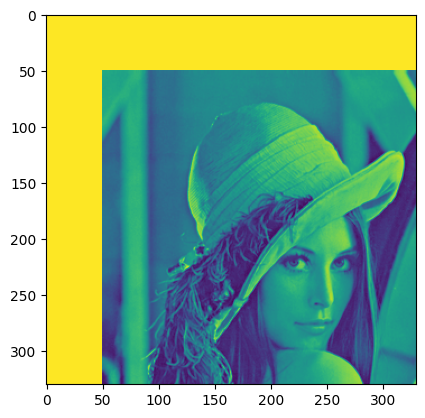

In [17]:
new = translate(img, 50, 50, border_color=(255, 255, 0))
plt.imshow(new)
plt.show()